# Uploading and reading data 

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Reading data csv
df = pd.read_csv("dataB.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True) 
df

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,4,4,3,0,0,4,2,1,4,1,...,1,3,0,4,2,1,1,4,5,0
1,5,1,4,3,1,3,5,1,4,4,...,1,1,3,3,1,3,3,5,4,0
2,1,3,0,3,1,1,0,1,0,2,...,3,0,2,4,2,2,1,2,4,0
3,5,3,2,3,5,2,2,0,4,5,...,5,4,5,1,4,4,2,4,4,0
4,3,5,3,3,0,4,1,1,4,3,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,4,0,3,0,4,0,4,3,1,2,...,0,1,4,5,4,2,2,2,2,4
2062,2,2,3,4,2,1,2,3,3,4,...,4,0,1,3,4,0,2,3,2,4
2063,2,3,2,3,1,2,5,5,5,0,...,5,1,1,2,5,2,1,1,3,4
2064,5,2,4,3,1,0,3,2,2,1,...,3,2,3,1,4,2,4,3,4,4


In [3]:
#Normalizing data and fitting PCA model
X = df.values
y = df.loc[:,['gnd']].values

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=20)

prinComps = pca.fit_transform(X)

columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
pcaDf = pd.DataFrame(data = prinComps, columns=columns)
pcaDf


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,10.038880,-6.489256,-5.007453,-3.928635,-3.028471,-2.848759,1.275941,1.586164,6.783187,-0.591506,0.507965,0.841599,0.416641,0.257938,3.385782,0.472335,1.063199,0.097979,-1.403217,1.221141
1,11.483549,-7.245434,-5.023136,-3.771646,-2.115633,-0.139772,1.683404,3.061228,5.982200,-1.726930,-3.128524,0.061620,-1.077180,-1.696380,3.771804,-0.043354,0.957336,1.332328,-0.893324,0.089278
2,3.733308,-4.782792,-2.427895,4.285498,-6.625335,-3.319659,3.664414,5.561008,3.503396,2.952107,0.899807,2.177189,0.400380,1.046915,-3.265501,0.226349,1.080075,2.728324,0.954777,5.226477
3,7.362846,-6.180557,-3.168641,3.849652,-4.419065,-5.600947,3.972904,5.069269,6.759905,1.297167,-0.985888,2.545888,0.843113,2.089527,-1.803470,0.130958,1.912563,3.825185,-1.207967,3.044919
4,18.114525,-2.101979,-4.192178,-5.299639,-7.622021,4.424568,-2.185205,2.944801,2.580123,-1.434473,3.813954,-3.450866,0.214088,-6.546868,2.330956,0.175164,1.116057,-1.398408,0.663117,2.096857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,-1.981429,0.023301,8.089263,-0.253517,-2.022232,-2.328041,-3.861387,-3.826501,1.387289,-1.671064,-0.516947,-0.678566,2.498235,0.458651,0.771072,1.297421,-1.956365,-0.526064,-0.339688,-0.429204
2062,0.450091,3.141775,9.175125,0.468459,-2.065614,4.522217,-1.436469,-3.039222,-1.772890,2.881657,-3.970239,3.199529,2.302043,1.760897,-0.467691,-1.684062,2.276689,3.571966,0.451462,0.992426
2063,-0.416020,-0.486801,8.341679,0.433367,-2.643170,-2.842079,-3.678433,-3.045690,-1.383356,0.709677,1.735685,0.527996,0.071545,1.099821,1.986394,-2.615058,2.481909,-1.078259,-1.283955,-0.934727
2064,-3.166032,-1.782459,6.342243,-1.870071,-0.010120,-2.578905,-2.099942,-0.099820,1.332870,-2.067185,0.084766,-0.579215,1.384944,-0.868564,2.111749,-1.354209,0.790766,-1.498888,-0.042504,-1.666609


# Computing Eigenvalues and plotting

In [4]:
#Computing eiganvalues and eigenvectors
i = 0
eigenV = []
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.dot(X_centered.T, X_centered) / X.shape[0]
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)))
    print(eigenvalue)
    eigenV.append(eigenvalue)


51.79129155650564
51.816372085104305
28.81701674849092
28.830971720276526
27.031776915093435
27.044867363956758
24.06973792186684
24.08139396924885
21.622133841405727
21.632604608289995
15.894746390034985
15.902443599529944
13.855233150398677
13.861942522344435
11.919364057761758
11.925135485892651
10.715320955236907
10.720507402432148
9.829315422069788
9.834067516517619
9.133810874600325
9.138214045341552
8.291658241753282
8.295652447184214
7.466541128071965
7.4699438918609316
7.182749176857594
7.18548356233313
7.018648520135709
7.021905467064753
6.7275609424234215
6.729752739997738
6.167172530107132
6.168853886272362
6.021636408915947
6.020250616081034
5.965904752116266
5.966915167198916
5.749598717118224
5.7498425241042


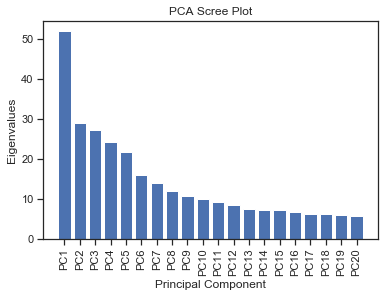

In [5]:
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
plt.bar(x= range(0,20), height=eigenV, tick_label=columns)
plt.ylabel('Eigenvalues')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('PCA Scree Plot')
plt.show()

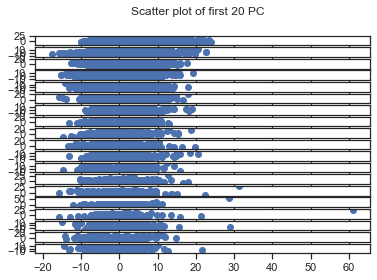

In [6]:
#Plot of the project data with the top 20 eigenvalues

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19) = plt.subplots(19, sharex=True)
fig.suptitle('Scatter plot of first 20 PC')
ax1.scatter(pcaDf['PC1'],pcaDf['PC2'])
ax2.scatter(pcaDf['PC2'],pcaDf['PC3'])
ax3.scatter(pcaDf['PC3'],pcaDf['PC4'])
ax4.scatter(pcaDf['PC4'],pcaDf['PC5'])
ax5.scatter(pcaDf['PC5'],pcaDf['PC6'])
ax6.scatter(pcaDf['PC6'],pcaDf['PC7'])
ax7.scatter(pcaDf['PC7'],pcaDf['PC8'])
ax8.scatter(pcaDf['PC8'],pcaDf['PC9'])
ax9.scatter(pcaDf['PC9'],pcaDf['PC10'])
ax10.scatter(pcaDf['PC10'],pcaDf['PC11'])
ax11.scatter(pcaDf['PC11'],pcaDf['PC12'])
ax12.scatter(pcaDf['PC12'],pcaDf['PC13'])
ax13.scatter(pcaDf['PC13'],pcaDf['PC14'])
ax14.scatter(pcaDf['PC14'],pcaDf['PC15'])
ax15.scatter(pcaDf['PC15'],pcaDf['PC16'])
ax16.scatter(pcaDf['PC16'],pcaDf['PC17'])
ax17.scatter(pcaDf['PC17'],pcaDf['PC18'])
ax18.scatter(pcaDf['PC18'],pcaDf['PC19'])
ax19.scatter(pcaDf['PC19'],pcaDf['PC20'])



# 2-dimensional plot of pc1 vs pc2

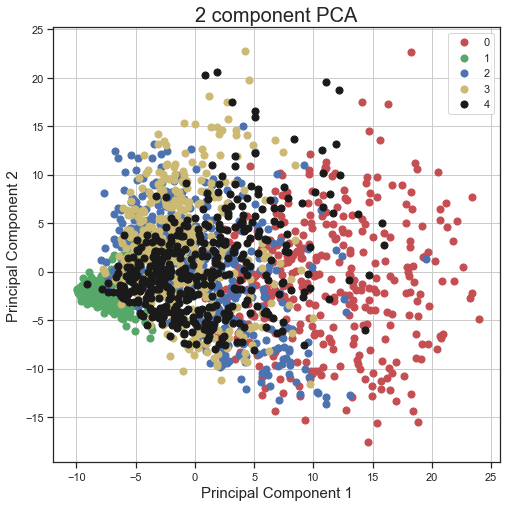

In [7]:
#Plot of two 2-dimensional of PC1 vs PC2 

finalDf_1v2 = pd.concat([pcaDf['PC1'], pcaDf['PC2']], axis=1)
                     
finalDf_1v2 = pd.concat([finalDf_1v2, df['gnd']], axis = 1)



fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
options = ['0', '1', '2', '3', '4']
colors = ['r', 'g', 'b', 'y', 'k']

gnds_0_PC1 = []
gnds_0_PC2 = []

gnds_1_PC1 = []
gnds_1_PC2 = []

gnds_2_PC1 = []
gnds_2_PC2 = []

gnds_3_PC1 = []
gnds_3_PC2 = []

gnds_4_PC1 = []
gnds_4_PC2 = []


for i in range(2066):
    if finalDf_1v2.loc[i, 'gnd'] == 0:
        gnds_0_PC1.append(finalDf_1v2.loc[i, 'PC1'])
        gnds_0_PC2.append(finalDf_1v2.loc[i, 'PC2'])
    if finalDf_1v2.loc[i, 'gnd'] == 1:
        gnds_1_PC1.append(finalDf_1v2.loc[i, 'PC1'])
        gnds_1_PC2.append(finalDf_1v2.loc[i, 'PC2'])
    if finalDf_1v2.loc[i, 'gnd'] == 2:
        gnds_2_PC1.append(finalDf_1v2.loc[i, 'PC1'])
        gnds_2_PC2.append(finalDf_1v2.loc[i, 'PC2'])
    if finalDf_1v2.loc[i, 'gnd'] == 3:
        gnds_3_PC1.append(finalDf_1v2.loc[i, 'PC1'])
        gnds_3_PC2.append(finalDf_1v2.loc[i, 'PC2'])
    if finalDf_1v2.loc[i, 'gnd'] == 4:
        gnds_4_PC1.append(finalDf_1v2.loc[i, 'PC1'])
        gnds_4_PC2.append(finalDf_1v2.loc[i, 'PC2'])


ax.scatter(gnds_0_PC1
    , gnds_0_PC2
    , c = 'r'
    , s = 50)
ax.scatter(gnds_1_PC1
    , gnds_1_PC2
    , c = 'g'
    , s = 50)
ax.scatter(gnds_2_PC1
    , gnds_2_PC2
    , c = 'b'
    , s = 50)
ax.scatter(gnds_3_PC1
    , gnds_3_PC2
    , c = 'y'
    , s = 50)
ax.scatter(gnds_4_PC1
    , gnds_4_PC2
    , c = 'k'
    , s = 50)
ax.legend(options)
ax.grid()


# 2-dimensional plot of pc1 vs pc2

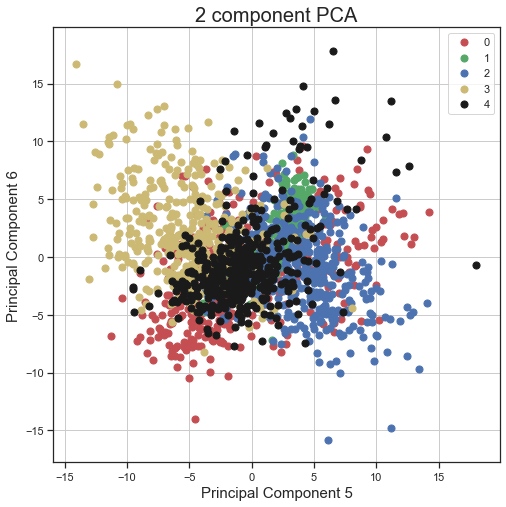

In [8]:
#Plot of two 2-dimensional of PC5 vs PC6 

finalDf_5v6 = pd.concat([pcaDf['PC5'], pcaDf['PC6']], axis=1)
                     
finalDf_5v6 = pd.concat([finalDf_5v6, df['gnd']], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 5', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
options = ['0', '1', '2', '3', '4']
colors = ['r', 'g', 'b', 'y', 'k']

gnds_0_PC5 = []
gnds_0_PC6 = []

gnds_1_PC5 = []
gnds_1_PC6 = []

gnds_2_PC5 = []
gnds_2_PC6 = []

gnds_3_PC5 = []
gnds_3_PC6 = []

gnds_4_PC5 = []
gnds_4_PC6 = []


for i in range(2066):
    if finalDf_5v6.loc[i, 'gnd'] == 0:
        gnds_0_PC5.append(finalDf_5v6.loc[i, 'PC5'])
        gnds_0_PC6.append(finalDf_5v6.loc[i, 'PC6'])
    if finalDf_5v6.loc[i, 'gnd'] == 1:
        gnds_1_PC5.append(finalDf_5v6.loc[i, 'PC5'])
        gnds_1_PC6.append(finalDf_5v6.loc[i, 'PC6'])
    if finalDf_5v6.loc[i, 'gnd'] == 2:
        gnds_2_PC5.append(finalDf_5v6.loc[i, 'PC5'])
        gnds_2_PC6.append(finalDf_5v6.loc[i, 'PC6'])
    if finalDf_5v6.loc[i, 'gnd'] == 3:
        gnds_3_PC5.append(finalDf_5v6.loc[i, 'PC5'])
        gnds_3_PC6.append(finalDf_5v6.loc[i, 'PC6'])
    if finalDf_5v6.loc[i, 'gnd'] == 4:
        gnds_4_PC5.append(finalDf_5v6.loc[i, 'PC5'])
        gnds_4_PC6.append(finalDf_5v6.loc[i, 'PC6'])


ax.scatter(gnds_0_PC5
    , gnds_0_PC6
    , c = 'r'
    , s = 50)
ax.scatter(gnds_1_PC5
    , gnds_1_PC6
    , c = 'g'
    , s = 50)
ax.scatter(gnds_2_PC5
    , gnds_2_PC6
    , c = 'b'
    , s = 50)
ax.scatter(gnds_3_PC5
    , gnds_3_PC6
    , c = 'y'
    , s = 50)
ax.scatter(gnds_4_PC5
    , gnds_4_PC6
    , c = 'k'
    , s = 50)
ax.legend(options)
ax.grid()


# LDA Analysis

In [30]:
#Normalizing data and fitting PCA model
df = pd.read_csv("dataB.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True) 
df
X = df
y = np.ravel(df.loc[:,['gnd']].values)


lda = LDA(n_components=4)
lda.fit(X,y)
ldaComps = lda.transform(X)
print(ldaComps)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
pcaDf = pd.DataFrame(data = ldaComps, columns=columns)
pcaDf['PC1']






[[-5.27723328 -2.0529124   3.47382341 -1.61351792]
 [-5.91372692 -1.95348169  3.66530441  0.18960552]
 [-4.15454288 -0.86888763  1.17253772  0.74660534]
 ...
 [-1.31128997  5.39808628  0.2169969  -1.33361482]
 [ 0.21324713  5.1609646  -0.01666172 -0.18685145]
 [ 0.40452267  4.31739633 -0.31330884  0.74747194]]


C:\Users\Hasnain\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,PC1,PC2,PC3,PC4
0,-5.277233,-2.052912,3.473823,-1.613518
1,-5.913727,-1.953482,3.665304,0.189606
2,-4.154543,-0.868888,1.172538,0.746605
3,-6.728769,-2.568941,4.442847,-0.640440
4,-6.977105,-2.125944,2.281978,-0.505802
...,...,...,...,...
2061,-1.493870,3.310943,-0.571532,0.611935
2062,-0.249322,4.925294,0.091210,-2.307546
2063,-1.311290,5.398086,0.216997,-1.333615
2064,0.213247,5.160965,-0.016662,-0.186851


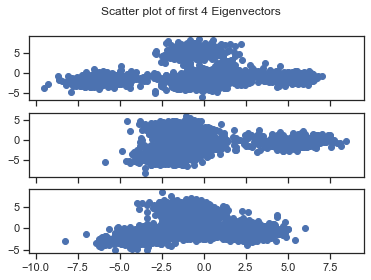

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Scatter plot of first 4 Eigenvectors')
ax1.scatter(pcaDf['PC1'],pcaDf['PC2'])
ax2.scatter(pcaDf['PC2'],pcaDf['PC3'])
ax3.scatter(pcaDf['PC3'],pcaDf['PC4'])